In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [105]:
#Cargar el dataset Mall_Customers
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,ID_cliente,Sexo,Edad,Renta_anual(k$),Puntuacion_gasto(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [106]:
dataset.shape

(200, 5)

In [107]:
#Eliminar la columna especificada
data = dataset.drop(['ID_cliente', 'Sexo'], axis=1)

In [108]:
data.head()

,Edad,Renta_anual(k$),Puntuacion_gasto(1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [58]:
#Validar estadisticas generales del dataset
data.describe()

,Edad,Renta_anual(k$),Puntuacion_gasto(1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [59]:
#Validar cantidad de valores nulos
data.isna().sum()

Edad                       0
Renta_anual(k$)            0
Puntuacion_gasto(1-100)    0
dtype: int64

In [60]:
#Eliminar valores nulos en coso de que tengamos nulos
data.dropna()

,Edad,Renta_anual(k$),Puntuacion_gasto(1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


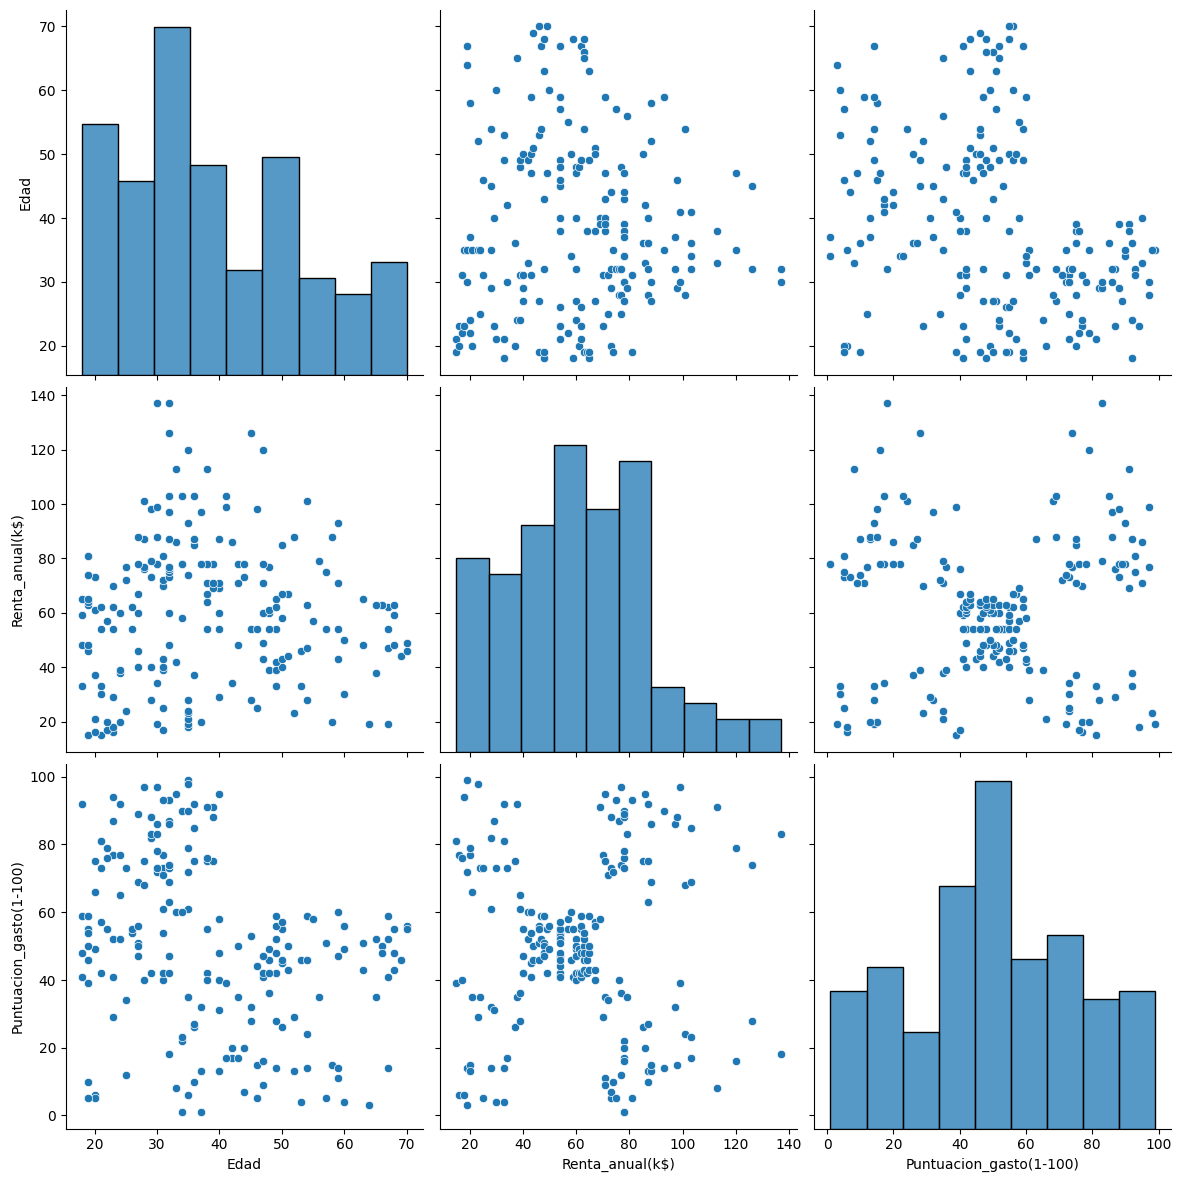

In [61]:
#Generar diagramas de dispersión 
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [62]:
#Validar matriz de correlación 
corr_matrix = data.corr()
corr_matrix

,Edad,Renta_anual(k$),Puntuacion_gasto(1-100)
Edad,1.000000,-0.012398,-0.327227
Renta_anual(k$),-0.012398,1.000000,0.009903
Puntuacion_gasto(1-100),-0.327227,0.009903,1.000000


<Axes: >

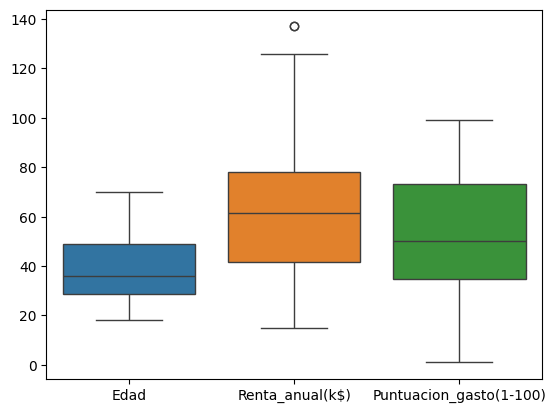

In [63]:
#Diagramas de caja para cada variable
sns.boxplot(data=data)

In [64]:
#Estandarizar datos(A cada valor le resta la media y se divide en la desviación estandar)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,Edad,Renta_anual(k$),Puntuacion_gasto(1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


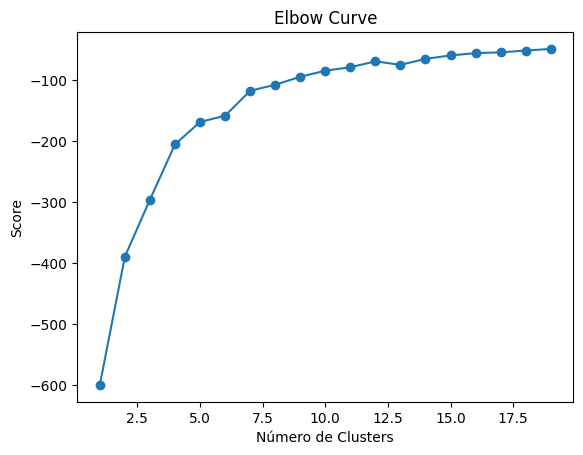

In [65]:
#Entrenar k-mean entre el rango 1 a 20
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [66]:
#Hallar los centroids mediante la cantidad de Clusters analizados anteriormente
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 1.20484056, -0.23577338, -0.05236781],
       [-0.74239092,  0.03357232,  0.82455289],
       [ 0.07333084,  0.97494509, -1.19729675],
       [ 0.35087671, -1.30419961, -1.1251501 ]])

In [117]:
#Obtener las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
#Obtener los centroids
C = kmeans.cluster_centers_
colores=['red','green','yellow','black']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

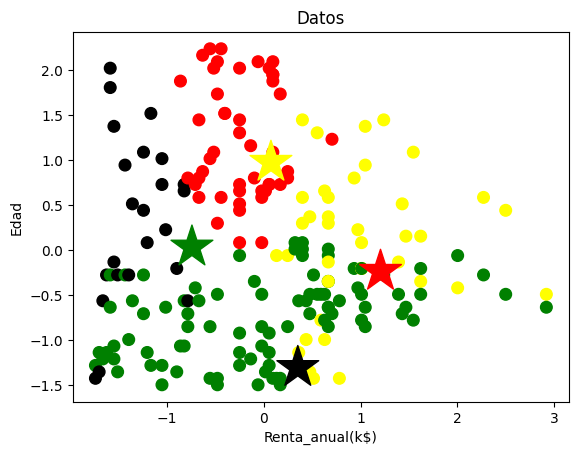

In [118]:
f1 = X['Renta_anual(k$)'].values
f2 = X['Edad'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos')
plt.xlabel('Renta_anual(k$)')
plt.ylabel('Edad')
plt.show()

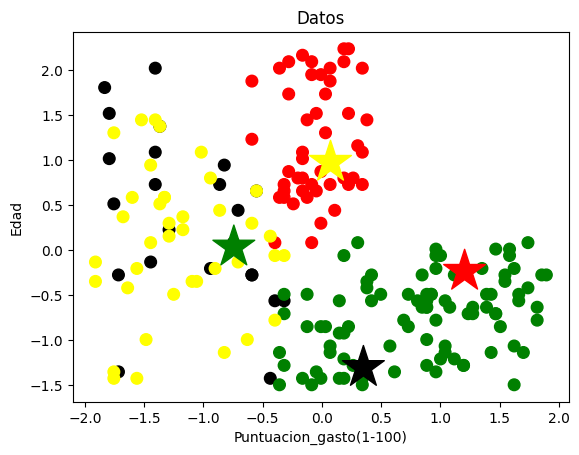

In [119]:
f1 = X['Puntuacion_gasto(1-100)'].values
f2 = X['Edad'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)  # Utilizando las primeras dos columnas de C
plt.title('Datos')
plt.xlabel('Puntuacion_gasto(1-100)')
plt.ylabel('Edad')
plt.show()

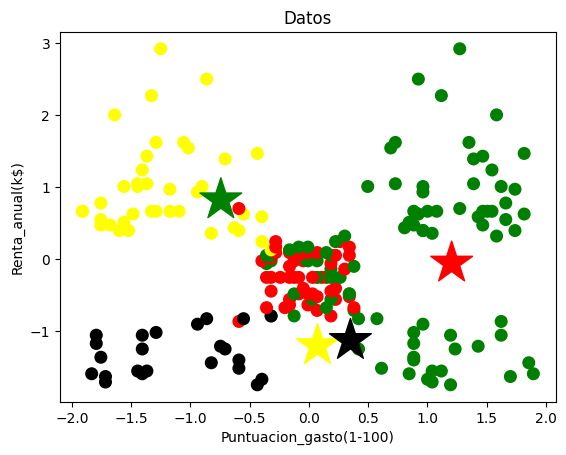

In [120]:
f1 = X['Puntuacion_gasto(1-100)'].values
f2 = X['Renta_anual(k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos')
plt.xlabel('Puntuacion_gasto(1-100)')
plt.ylabel('Renta_anual(k$)')
plt.show()

In [121]:
#Ingredar valores mendiante un arreglo
X_new = scaler.fit_transform(np.array([[1,10,100]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[1]
['green']


In [122]:
#Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.3514858470238852
Índice de Calinski-Harabasz: 89.82364557433827
Inertia (suma de cuadrados dentro de los clusters): 252.64735286787538
Davies-Bouldin Index: 0.952883647876086


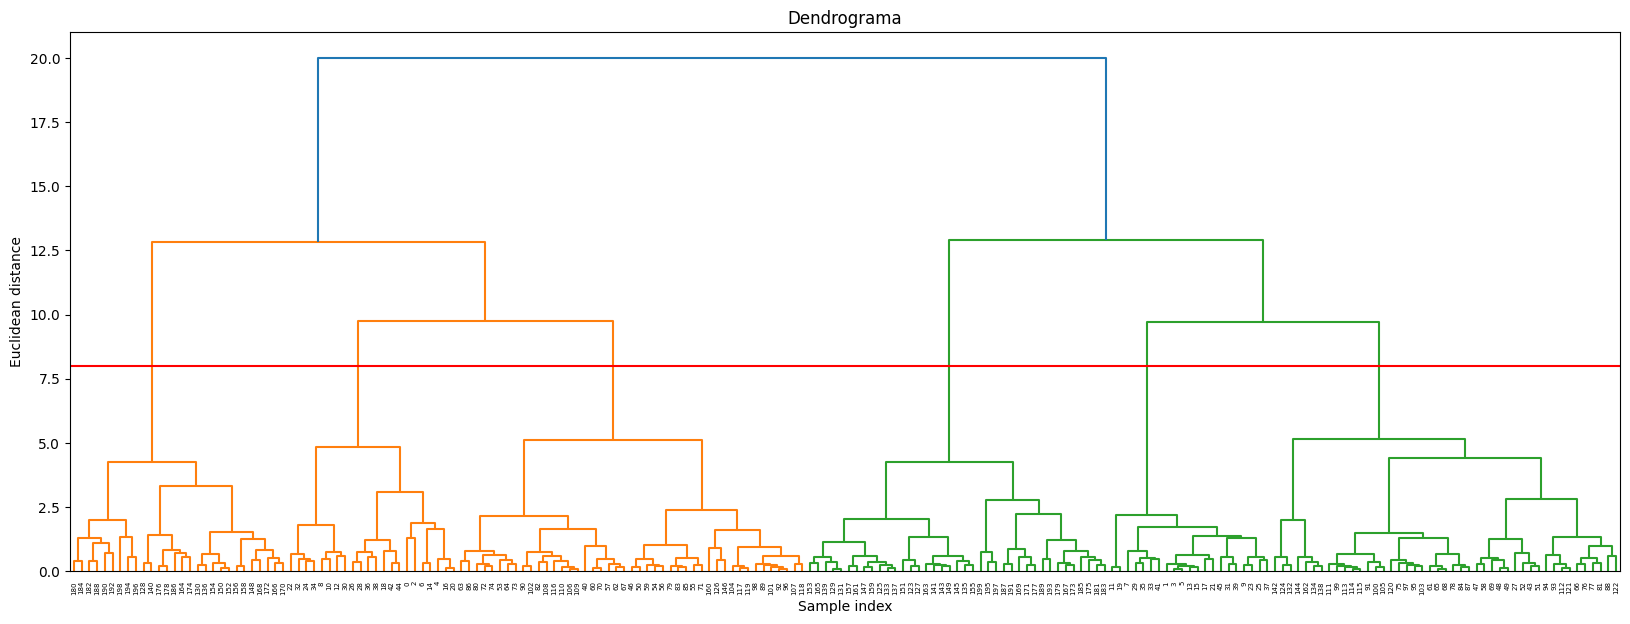

In [123]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 8, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [124]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [125]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])

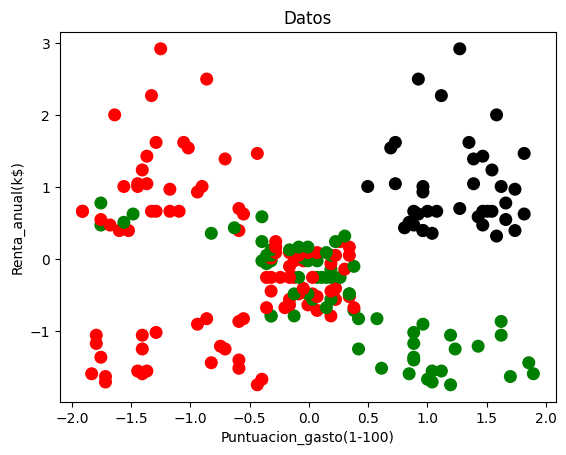

In [126]:
f1 = X['Puntuacion_gasto(1-100)'].values
f2 = X['Renta_anual(k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos')
plt.xlabel('Puntuacion_gasto(1-100)')
plt.ylabel('Renta_anual(k$)')
plt.show()


In [148]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

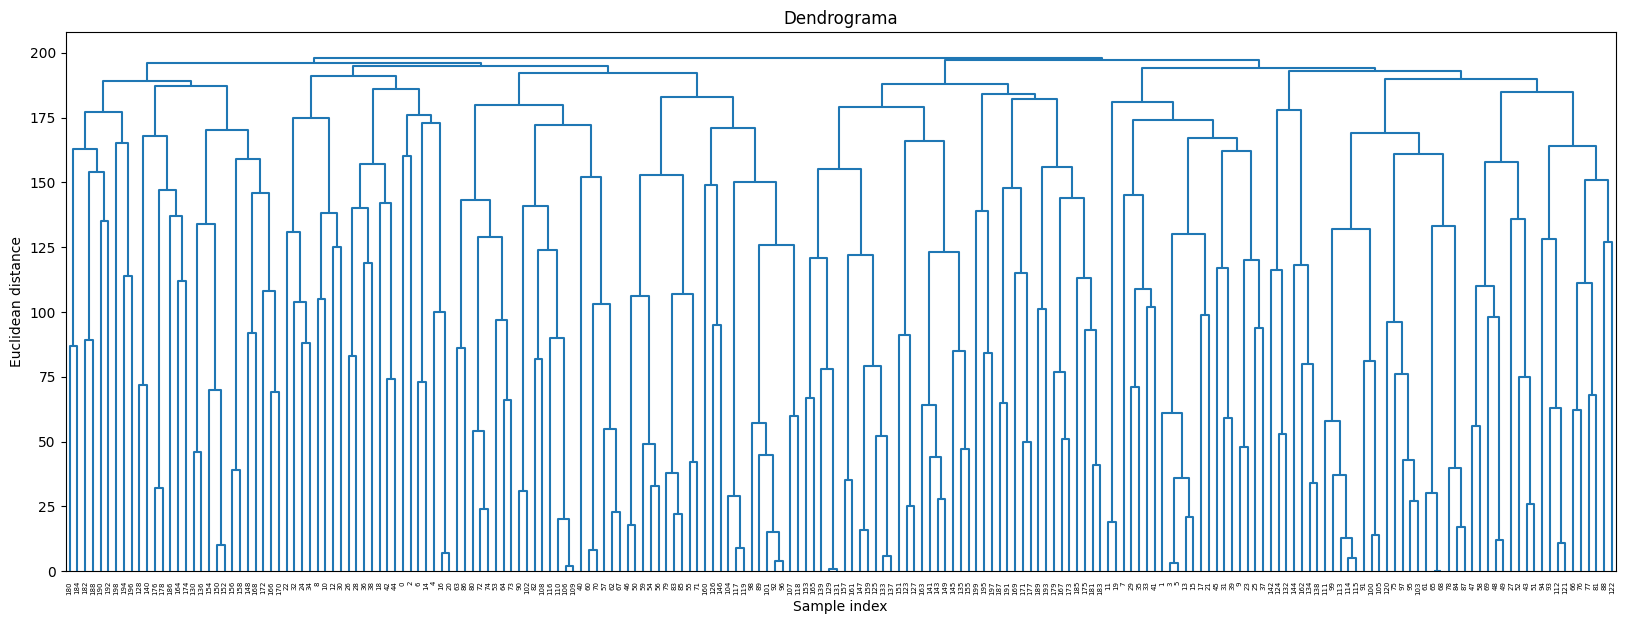

In [150]:
plot_dendrogram(hier_clustering, color_threshold=0)

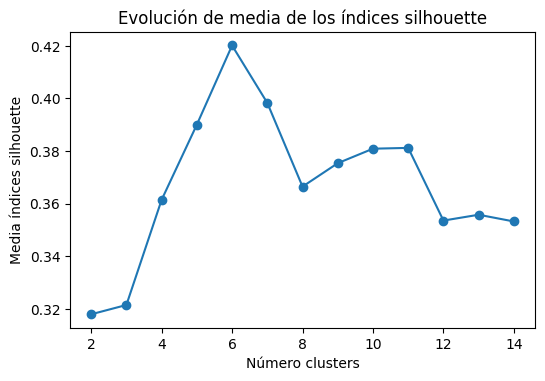

In [151]:
# Método silhouette para identificar el número óptimo de clusters
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');


In [152]:
#Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))



Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.32148866683112387
Índice de Calinski-Harabasz: 88.10174149244529
Davies-Bouldin Index: 1.1277290061047862


In [153]:
#Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
#Compute the distances
X_dist = pdist(X)
#Compute the linkage matrix
Z = linkage(X, 'ward')
#Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6261774947075186, array([20.00004498,  1.28368768, 20.00004498, ..., 20.00004498,
        0.74145991, 20.00004498]))


<h1>Interpretación y análisis de los resultados del clustering</h1>

<h2>Descripción del conjunto de datos:</h2>
<p>El conjunto de dato contiene información sobre clientes, incluyendo su renta anual, puntuación de gasto y edad.</p>

<h2>Análisis del clustering K-Means:</h2>
<ul>
    <li>Puntaje de silueta: 0.35, lo que indica una agrupación deficiente. Un puntaje de silueta cercano a 1 indica una buena agrupación, mientras que un puntaje cercano a 0 indica una mala agrupación.</li>
    <li>Índice de Calinski-Harabasz: 89.8, lo que indica una agrupación razonable. Un valor alto de este índice indica una buena agrupación.</li>
    <li>Inertia: 252.65, esta medida no tiene una interpretación directa, pero se utiliza para comparar diferentes agrupaciones.</li>
    <li>Índice de Davies-Bouldin: 0.95, lo que indica una agrupación razonable. Un valor bajo de este índice indica una buena agrupación.</li>
</ul>

<h2>Análisis del clustering jerárquico:</h2>
<ul>
    <li>Puntaje de silueta: 0.32, lo que indica una agrupación deficiente. Similar al caso de K-Means.</li>
    <li>Índice de Calinski-Harabasz: 88.1, lo que indica una agrupación razonable. Un valor alto de este índice indica una buena agrupación.</li>
    <li>Índice de Davies-Bouldin: 1.13, lo que indica una agrupación razonable. Un valor bajo de este índice indica una buena agrupación.</li>
</ul>

<h2>Coeficiente de correlación cofenética:</h2>
<ul>
    <li>Valor: 0.63, lo que indica una relación moderada entre la distancia jerárquica y la similitud de los datos. Un valor cercano a 1 indica una fuerte relación, mientras que un valor cercano a 0 indica una débil relación.</li>
    <li>Dendrograma: La matriz de distancias del dendrograma muestra que los datos se agrupan en 20 clusters.</li>
</ul>

<h2>Conclusión:</h2>
<p>En base a las medidas de calidad evaluadas, el clustering K-Means y el clustering jerárquico presentan un rendimiento similar, con una agrupación razonable pero no óptima.</p>
